<a href="https://colab.research.google.com/github/Satwikram/NLP-Implementations/blob/main/Generative%20Models/Generating%20Text%20-%20using%20different%20decoding%20methods%20for%20language%20generation%20with%20Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

### Setup

In [9]:
!pip install transformers

### Importing Dependencies

In [11]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

### Initializing the tokenizer

In [12]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


### Greedy Search

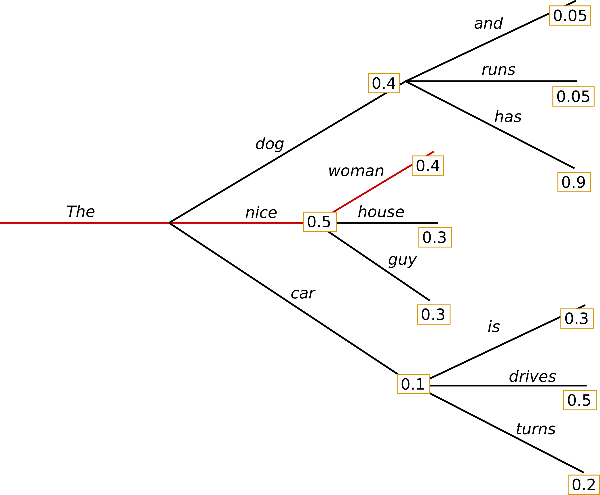

### Encode context the generation is conditioned on

In [13]:
input_ids = tokenizer.encode('I enjoy walking with my cute dog', return_tensors='tf')

### Generate text until the output length (which includes the context length) reaches 50


In [14]:
greedy_output = model.generate(input_ids, max_length=50)

In [16]:
print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll


### Beam search

Beam search reduces the risk of missing hidden high probability word sequences by keeping the most likely num_beams of hypotheses at each time step and eventually choosing the hypothesis that has the overall highest probability. Let's illustrate with num_beams=2:

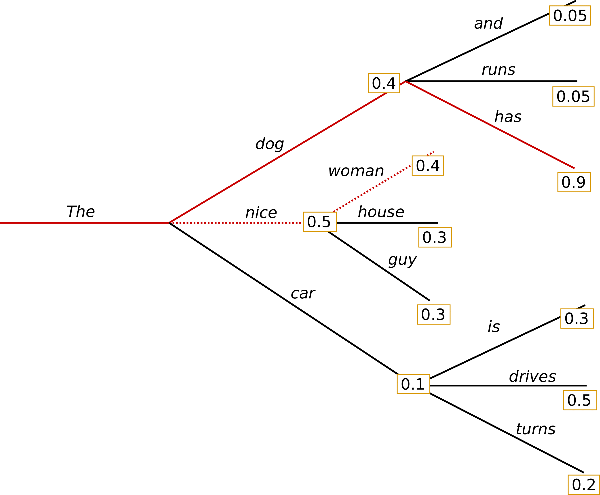

At time step 1, besides the most likely hypothesis 
(
"The"
,
"nice"
)
("The","nice"), beam search also keeps track of the second most likely one 
(
"The"
,
"dog"
)
("The","dog"). At time step 2, beam search finds that the word sequence 
(
"The"
,
"dog"
,
"has"
)
("The","dog","has"), has with 
0.36
0.36 a higher probability than 
(
"The"
,
"nice"
,
"woman"
)
("The","nice","woman"), which has 
0.2
0.2 . Great, it has found the most likely word sequence in our toy example!

Beam search will always find an output sequence with higher probability than greedy search, but is not guaranteed to find the most likely output.

Let's see how beam search can be used in transformers. We set num_beams > 1 and early_stopping=True so that generation is finished when all beam hypotheses reached the EOS token.

In [17]:
# activate beam search and early_stopping
beam_output = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again. I'm not sure if I'll


### Let's try it out by setting no_repeat_ngram_size=2 so that no 2-gram appears twice:



In [18]:
# set no_repeat_ngram_size to 2
beam_output = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to take a break


### Set return_num_sequences > 1


In [19]:
beam_outputs = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    num_return_sequences=5, 
    early_stopping=True
)

# now we have 3 output sequences
print("Output:\n" + 100 * '-')
for i, beam_output in enumerate(beam_outputs):
  print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to take a break
1: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to get back to
2: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with her again.

I've been thinking about this for a while now, and I think it's time for me to take a break
3: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with her again.

I've been thinking about this for a while now, and I think it's time for me to get back to
4: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about 

In [20]:
# set seed to reproduce results.
tf.random.set_seed(0)

# activate sampling and deactivate top_k by setting top_k sampling to 0
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog Reyn: on the platform in a bowling alley in Brooklyn, mint one," the partner admitted, laughing at the furred hair pounced on her collar. "Really? I just sat down and watched the rainbow bear


In [21]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# use temperature to decrease the sensitivity to low probability candidates
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=0, 
    temperature=0.7
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog and I like having a nice view of the world, including the one I'm walking through, but at the same time, I've got a little bit of an anxiety about it. And I'm trying to be


### Top-K Sampling

In [22]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# set top_k to 50
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=50
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog and I miss having to walk with my dog in the middle of one of the city's busiest hours at dusk. I was also inspired by the idea of creating an interactive map of the city but I think they really


### Top-p (nucleus) sampling

In [23]:
# set seed to reproduce results.
tf.random.set_seed(0)

# deactivate top_k sampling and sample only from 92% most likely words
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_p=0.92, 
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog and how on Earth this actually works, although I was reminded of one particular episode where Captain America comes to Vancouver Island to visit Agent Coulson at his house, for $1.50 to get him to act kind


In [24]:
# set seed to reproduce results.
tf.random.set_seed(0)

# set top_k = 50 and set top_p = 0.95 and num_return_sequences = 3
sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=50, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=3
)

print("Output:\n" + 100 * '-')
for i, sample_output in enumerate(sample_outputs):
  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))


Output:
----------------------------------------------------------------------------------------------------
0: I enjoy walking with my cute dog and I like having a fun time, so I was going to stop in the restaurant and get some coffee."

The second person I saw who didn't wear makeup at the restaurant was her ex-boyfriend
1: I enjoy walking with my cute dog, and the time you spent with my cats was wonderful and truly worth it. I also found it really funny that my dog gets all upset and irritable before he goes to bed, and is even more upset when
2: I enjoy walking with my cute dog, so it has been such an inspiration to me in her life."

Morton's story was shared on social media.

The mother-of-two said it was about the "trem
